In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import random
import haversine as hs
import os

#visualization of maps
import geopandas

import folium
from folium.plugins import HeatMap

from IPython.core.display import display, HTML

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
results=pd.read_csv('/content/drive/MyDrive/Technical Test DJoin /City Bike .csv')

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [35]:
results.describe()

,tripduration_second,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,birth_year
count,6.864421e+06,6.864421e+06,6.864421e+06,6.864421e+06,6.864421e+06,6.041419e+06
mean,9.995066e+02,4.073670e+01,-7.398652e+01,4.073634e+01,-7.398660e+01,1.977950e+03
std,1.253189e+04,5.560345e-02,9.077732e-02,7.085279e-02,1.209168e-01,1.173911e+01
min,6.000000e+01,0.000000e+00,-7.403423e+01,0.000000e+00,-7.406692e+01,1.874000e+03
25%,3.840000e+02,4.072020e+01,-7.399800e+01,4.072020e+01,-7.399810e+01,1.970000e+03
50%,6.360000e+02,4.073726e+01,-7.398860e+01,4.073705e+01,-7.398890e+01,1.981000e+03
75%,1.086000e+03,4.075320e+01,-7.397771e+01,4.075255e+01,-7.397771e+01,1.987000e+03
max,9.340261e+06,4.550636e+01,0.000000e+00,4.550636e+01,0.000000e+00,2.001000e+03


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864421 entries, 0 to 6864420
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration_second      int64  
 1   starttime                object 
 2   start_station_name       object 
 3   start_station_latitude   float64
 4   start_station_longitude  float64
 5   end_station_name         object 
 6   stoptime                 object 
 7   end_station_latitude     float64
 8   end_station_longitude    float64
 9   birth_year               float64
 10  gender                   object 
 11  usertype                 object 
dtypes: float64(5), int64(1), object(6)
memory usage: 628.5+ MB


Handle Missing Value

In [36]:
results.isna().sum()

tripduration_second             0
starttime                       0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_name                0
stoptime                        0
end_station_latitude            0
end_station_longitude           0
birth_year                 823002
gender                          0
usertype                        0
dtype: int64

Usia dapat dikatakan sebuah variabel yang terdistibusi secara normal. Oleh karena itu, untuk mengisi null value dapat dihandel dengan mengambil rata-rata usia

In [37]:
#menghandle format nilai yang tidak baku
results['birth_year'] = results['birth_year'].apply(lambda x: int(x) if isinstance(x, (int, float)) and len(str(x)) > 4 else x)

In [38]:
results['birth_year'] = results['birth_year'].fillna(results['birth_year'].mean())

In [39]:
results['birth_year'] = results['birth_year'].astype(int) #convert to integer

menambah kolom baru untuk melihat usia users (2017 menjadi acuan). :

In [45]:
results['age']=2017-results['birth_year']

Dictionaty :


*   User Type (**Customer** = 24-hour pass or 7-day pass user, **Subscriber** = Annual Member)
*   Trip Duration (in minutes)

Visualisasi

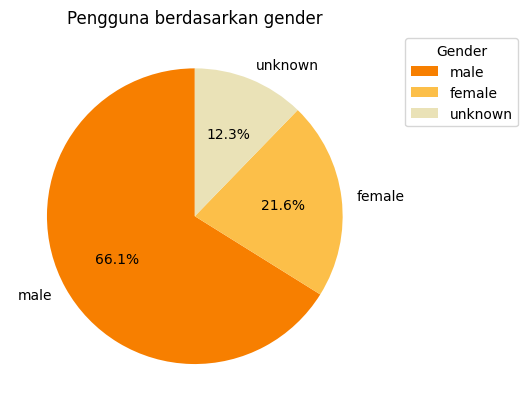

In [46]:
warna = ['#f77f00', '#fcbf49', '#eae2b7']

plt.pie(results['gender'].value_counts(),
        labels=results['gender'].unique(),
        autopct='%1.1f%%',
        colors=warna,
        startangle=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Pengguna berdasarkan gender')

plt.show()

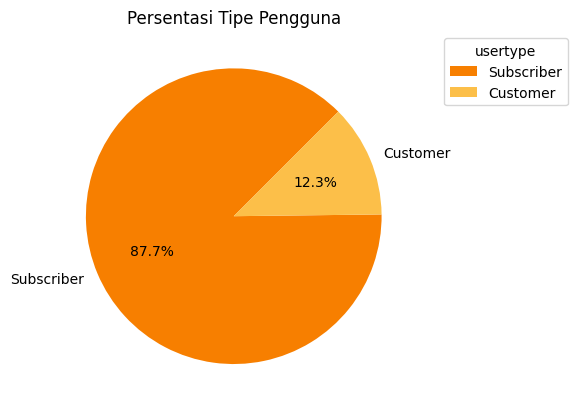

In [47]:
plt.pie(results['usertype'].value_counts(),
        labels=results['usertype'].unique(),
        autopct='%1.1f%%',
        colors=warna,
        startangle=45)
plt.legend(title='usertype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Persentasi Tipe Pengguna')

plt.show()

In [48]:
results['starttime']=pd.to_datetime(results['starttime'])
results['stopttime']=pd.to_datetime(results['stoptime'])

add columns **trip_type_by_duration** and **age_group**

trip_type_by_duration:

*"short trip"* - duration is **less than an hour**
*"average trip"* - duration **is less than a day**
*"long trip" *- duration is **less than a month**
*"extra long trip*" - duration **is more than a month**

In [49]:
results['trip_type_by_duration'] = np.where(
    results['tripduration_second'] < 3600, "short trip",
    np.where(
        (results['tripduration_second'] > 3600) & (results['tripduration_second'] < 3600 * 24), "average trip",
        np.where(
            (results['tripduration_second'] > 3600 * 24) & (results['tripduration_second'] < 3600 * 24 * 30), "long trip",
            "extra long trip"
        )
    )
)


In [50]:
results['age_group'] = np.where(
    results['age'] < 18, '[0, 18]',
    np.where(
    (results['age'] >= 18) & (results['age'] < 30), '[18, 30]',
        np.where(
            (results['age'] >= 30) & (results['age']< 50), '[30, 50]',
          np.where(
            (results['age'] >= 50) & (results['age']< 70), '[50, 70]',
             '[70+]'
            )
    )
  )
)

membuat kolom baru dengan menggabingkan Latitude dan longitude dalam satu kolom

In [51]:
results['start_station_location'] = results[['start_station_latitude',
                                                             'start_station_longitude']].values.tolist()
results['end_station_location'] = results[['end_station_latitude',
                                                           'end_station_longitude']].values.tolist()

mendrop Kolom latitude dan longitude yang sudah dimerge

In [52]:
results = results.drop(['start_station_latitude',
                                        'start_station_longitude',
                                        'end_station_latitude',
                                        'end_station_longitude'], axis = 1)

In [53]:
start_trip_info = results.groupby('start_station_name').agg({'start_station_name':'count'}).rename(
    columns={'start_station_name' : 'count_of_starts'}).reset_index().sort_values(by = 'start_station_name')

start_trip_info['start_station_location'] = results[['start_station_name', 'start_station_location']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_location']

#dataset with end station name, end station location and count of ends
end_trip_info = results.groupby('end_station_name').agg({'end_station_name':'count'}).rename(
    columns={'end_station_name' : 'count_of_ends'}).reset_index().sort_values(by = 'end_station_name')

end_trip_info['end_station_location'] = results[['end_station_name', 'end_station_location']].drop_duplicates(
    subset='end_station_name').sort_values(by='end_station_name').reset_index(drop=True)['end_station_location']

In [55]:
#dataset with start station name, start station location and count of starts
start_trip_info = results.groupby('start_station_name').agg({'start_station_name':'count'}).rename(
    columns={'start_station_name' : 'count_of_starts'}).reset_index().sort_values(by = 'start_station_name')

start_trip_info['start_station_location'] = results[['start_station_name', 'start_station_location']].drop_duplicates(
    subset='start_station_name').sort_values(by='start_station_name').reset_index(drop=True)['start_station_location']

#dataset with end station name, end station location and count of ends
end_trip_info = results.groupby('end_station_name').agg({'end_station_name':'count'}).rename(
    columns={'end_station_name' : 'count_of_ends'}).reset_index().sort_values(by = 'end_station_name')

end_trip_info['end_station_location'] = results[['end_station_name', 'end_station_location']].drop_duplicates(
    subset='end_station_name').sort_values(by='end_station_name').reset_index(drop=True)['end_station_location']

#dataset with station name, station location and sum of starts and ends
count_of_trips_by_stations = end_trip_info.merge(
    start_trip_info.rename(columns={'start_station_name': 'end_station_name'}), how='outer',
    on='end_station_name').rename(columns={'end_station_name': 'station_name'})

count_of_trips_by_stations['sum_of_starts_and_ends'] = (
    count_of_trips_by_stations['count_of_starts'].fillna(0) +
    count_of_trips_by_stations['count_of_ends'].fillna(0)
).astype('int')

# If there are still NaN values in 'sum_of_starts_and_ends' after the addition,
# you can replace them with 0 or any other desired value.
count_of_trips_by_stations['sum_of_starts_and_ends'] = count_of_trips_by_stations['sum_of_starts_and_ends'].fillna(0)

count_of_trips_by_stations = count_of_trips_by_stations.drop(
    ['count_of_starts', 'count_of_ends', 'end_station_location', 'start_station_location'],
    axis=1
)
count_of_trips_by_stations = count_of_trips_by_stations.sort_values(
    by='sum_of_starts_and_ends',
    ascending=False
).reset_index(drop=True)


top 10 Stasiun paling Populer

[Text(0, 0.5, ''), Text(0.5, 0, 'sum of starts and ends by stations')]

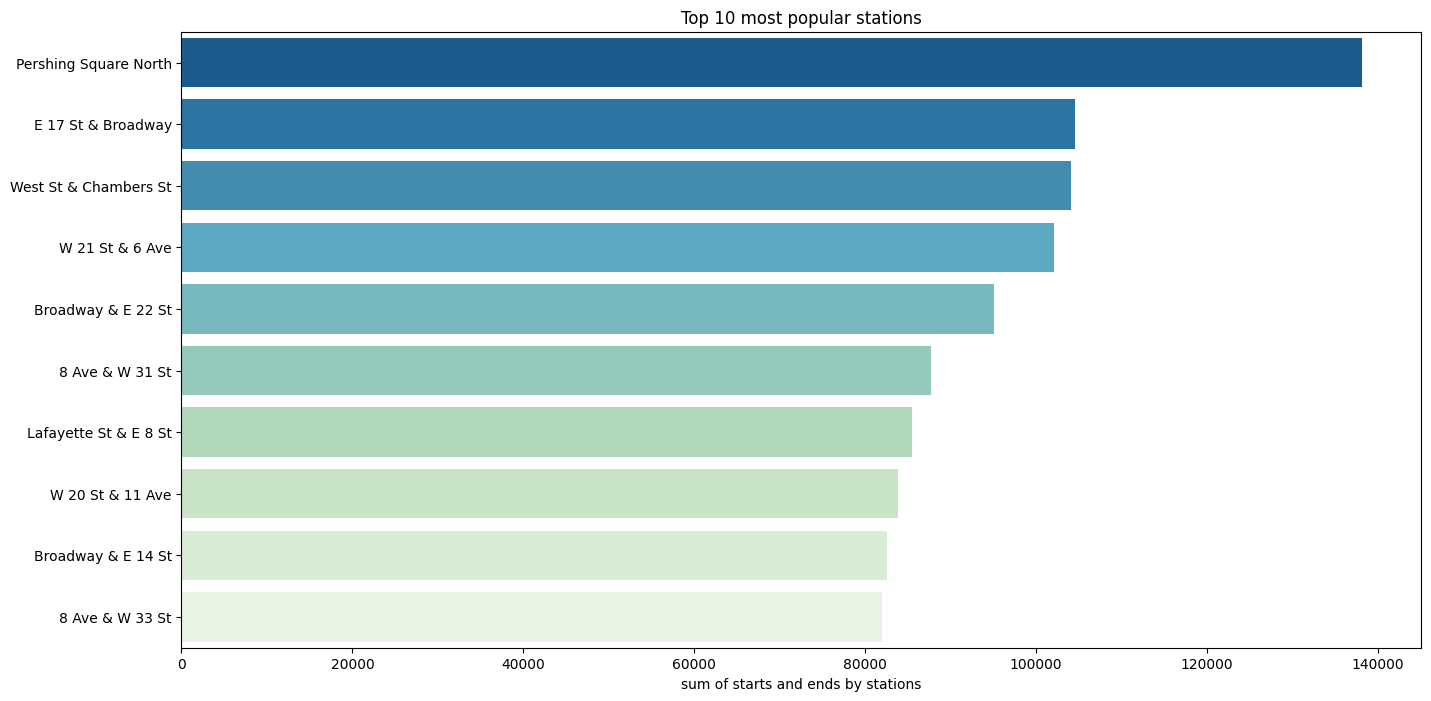

In [57]:
plt.figure(figsize=(16,8))
plt.title('Top 10 most popular stations')
ax = sns.barplot(x='sum_of_starts_and_ends',
                 y='station_name',
                 data=count_of_trips_by_stations[:10],
                 palette="GnBu_r")
ax.set(ylabel=None, xlabel="sum of starts and ends by stations")

In [63]:
# map stations which start the trips
map_points_of_start = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in start_trip_info.index:
    iframe = folium.IFrame(f'Station:"{start_trip_info["start_station_name"][point]}" <br>'
                           f'Count of started trips:{start_trip_info["count_of_starts"][point]}')
    popup = folium.Popup(iframe, min_width=200, max_width=200)
    folium.Marker(start_trip_info['start_station_location'][point], popup=popup,
              icon=folium.Icon(color='darkblue', icon='bicycle', prefix='fa')).add_to(map_points_of_start)

# map stations which end the trips
map_points_of_end = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in end_trip_info.index:
    iframe = folium.IFrame(f'Station:"{end_trip_info["end_station_name"][point]}" <br>'
                           f'Count of ended trips:{end_trip_info["count_of_ends"][point]}')
    popup = folium.Popup(iframe, min_width=200, max_width=200)
    folium.Marker(end_trip_info['end_station_location'][point], popup=popup,
                icon=folium.Icon(color='green', icon='home')).add_to(map_points_of_end)

# create subplots
htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_points_of_start.get_root().render().replace('"', '&quot;'),450,450,
                   map_points_of_end.get_root().render().replace('"', '&quot;'),450,450))
display(htmlmap)

melihat kepadatan Stasiun dengan Heatmap

In [64]:
heatmap_start_trip = folium.Map(location=[40.7128,-73.9352], default_zoom_start=12)
heatmap = HeatMap(end_trip_info['end_station_location'], max_zoom=1).add_to(heatmap_start_trip)
heatmap_start_trip

In [67]:
route = pd.DataFrame({'route' : results['start_station_name'] + ' - '
                                     + results['end_station_name'],
                     'location' : results['start_station_location']
                                     + results['end_station_location']})
route['location'] = route['location'].apply(lambda x: tuple(x))
routes_info = route.groupby('route').count().reset_index().rename(columns = {'location': 'number_of_trips'})
route_locations = route.sort_values(by='route').drop_duplicates().reset_index(drop = True)
routes_info['location'] = route_locations['location'].apply(lambda x: list(x))
routes_info = routes_info.sort_values(by = 'number_of_trips', ascending=False).reset_index(drop=True)
routes_info.head()

,route,number_of_trips,location
0,Central Park S & 6 Ave - Central Park S & 6 Ave,6772,"[40.73038599, -74.00214988, 40.72082834, -73.9..."
1,Grand Army Plaza & Central Park S - Grand Army...,2965,"[40.801694, -73.957145, 40.7867947, -73.977112]"
2,Centre St & Chambers St - Centre St & Chambers St,2695,"[40.799484, -73.955613, 40.7997568, -73.962112..."
3,12 Ave & W 40 St - West St & Chambers St,2692,"[40.76087502, -74.00277668, 40.8078316, -73.94..."
4,W 21 St & 6 Ave - 9 Ave & W 22 St,2330,"[40.73492695, -73.99200509, 40.695065, -73.987..."


Visualisasi Route Favorit

Text(0, 0.5, 'Route')

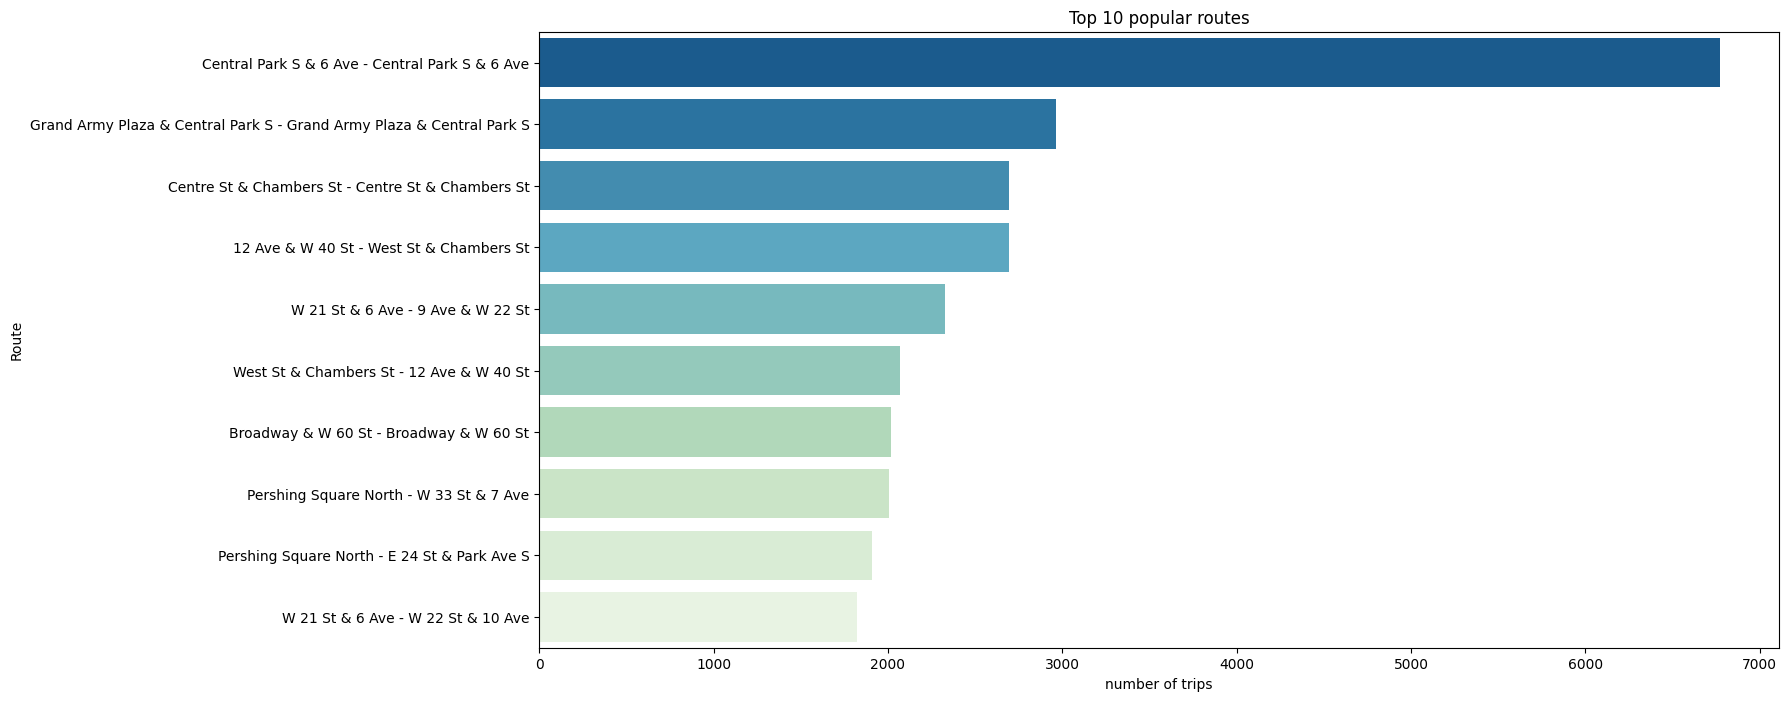

In [69]:
plt.figure(figsize=(16,8))
plt.title('Top 10 popular routes')
sns.barplot(y = routes_info['route'][:10], x = routes_info['number_of_trips'][:10],  palette="GnBu_r")
plt.xlabel('number of trips')
plt.ylabel('Route')

In [71]:
map_top_popular_routes = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)
for point in routes_info.index:
    if point  < 3:
        iframe_s = folium.IFrame(f'Start of route "{routes_info["route"][point]}"')
        popup_s = folium.Popup(iframe_s, min_width=200, max_width=200)
        folium.Marker(routes_info['location'][point][:2], popup=popup_s, icon=folium.Icon(
            color='blue',  icon='bicycle', prefix='fa')).add_to(map_top_popular_routes)

        iframe_e = folium.IFrame(f'End of route "{routes_info["route"][point]}"')
        popup_e = folium.Popup(iframe_e, min_width=300, max_width=300)
        folium.Marker(routes_info['location'][point][2:], popup=popup_e, icon=folium.Icon(color='green', icon='home')) \
            .add_to(map_top_popular_routes)
        folium.PolyLine([(routes_info['location'][point][:2], routes_info['location'][point][2:])],
                        color='red').add_to(map_top_popular_routes)
    else:
        break
map_top_popular_routes

Text(0.5, 0, 'starttime by dayofweek')

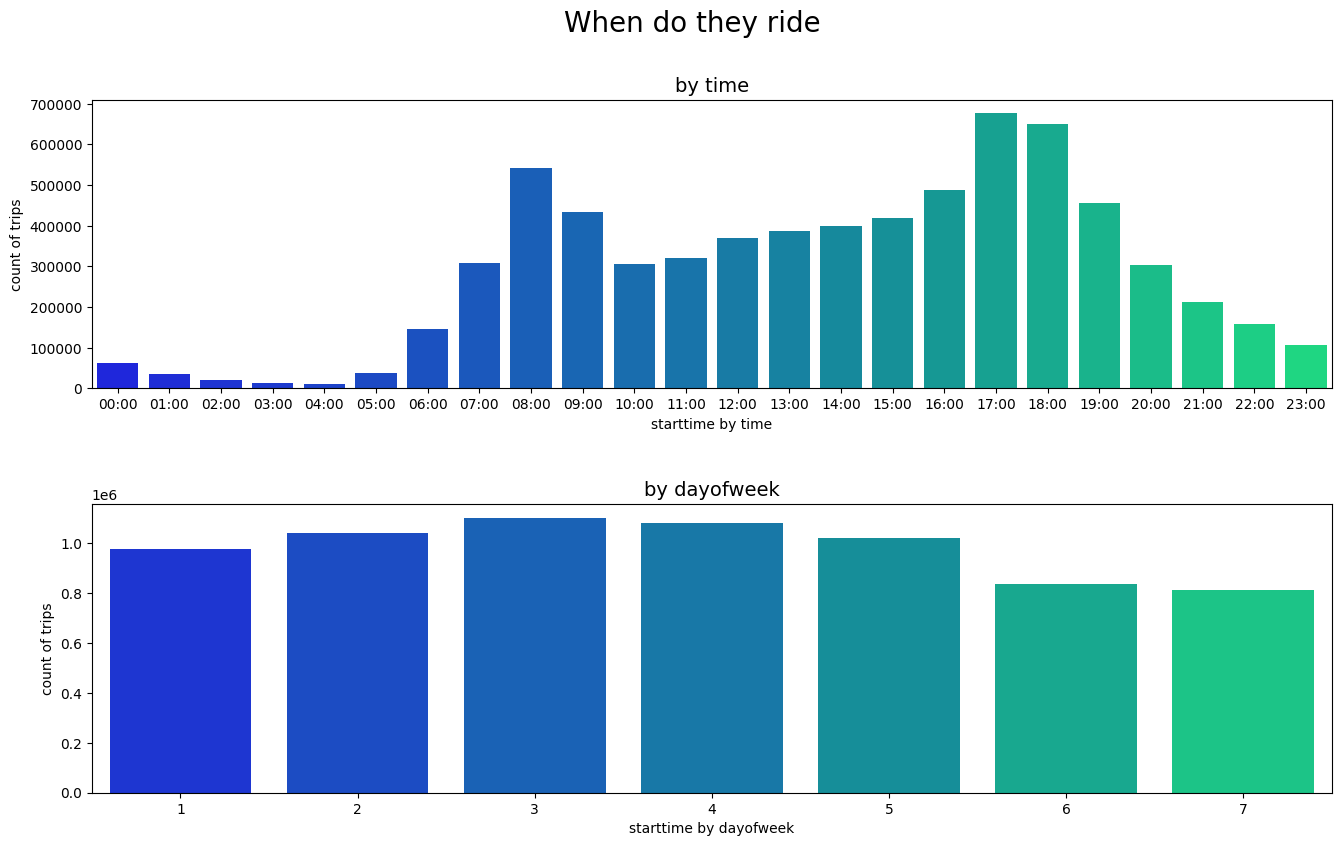

In [76]:
results['starttime_by_hours'] = results['starttime'].dt.strftime('%H:00')
results['starttime_by_dayofweek'] = results['starttime'].dt.dayofweek+1


count_of_trips_groupby_hours = results.groupby('starttime_by_hours').agg({'starttime_by_hours':'count'}).rename(
    columns = {'starttime_by_hours':'count_of_trips'}).reset_index()
count_of_trips_groupby_dayofweeks = results.groupby('starttime_by_dayofweek').agg(
    {'starttime_by_dayofweek':'count'}).rename(columns = {'starttime_by_dayofweek':'count_of_trips'}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(16,9))
plt.subplots_adjust(hspace=0.4)
fig.suptitle('When do they ride', size = 20)

sns.barplot(ax=axes[0], x='starttime_by_hours', y='count_of_trips', data=count_of_trips_groupby_hours,  palette="winter")
axes[0].set_title("Berdasrkan jam", size = 14)
axes[0].set_ylabel('jumlah trip')
axes[0].set_xlabel('waktu mulai berdarkan jam')

sns.barplot(ax=axes[1], x='starttime_by_dayofweek', y='count_of_trips', data=count_of_trips_groupby_dayofweeks,
            palette="winter").set(title='by dayofweek')
axes[1].set_title("Berdasakan Hari ", size = 14)
axes[1].set_ylabel('jumlah trip')
axes[1].set_xlabel('waktu mulai berdasrkan hari ')

Text(0, 0.5, 'Jumlah Pengguna')

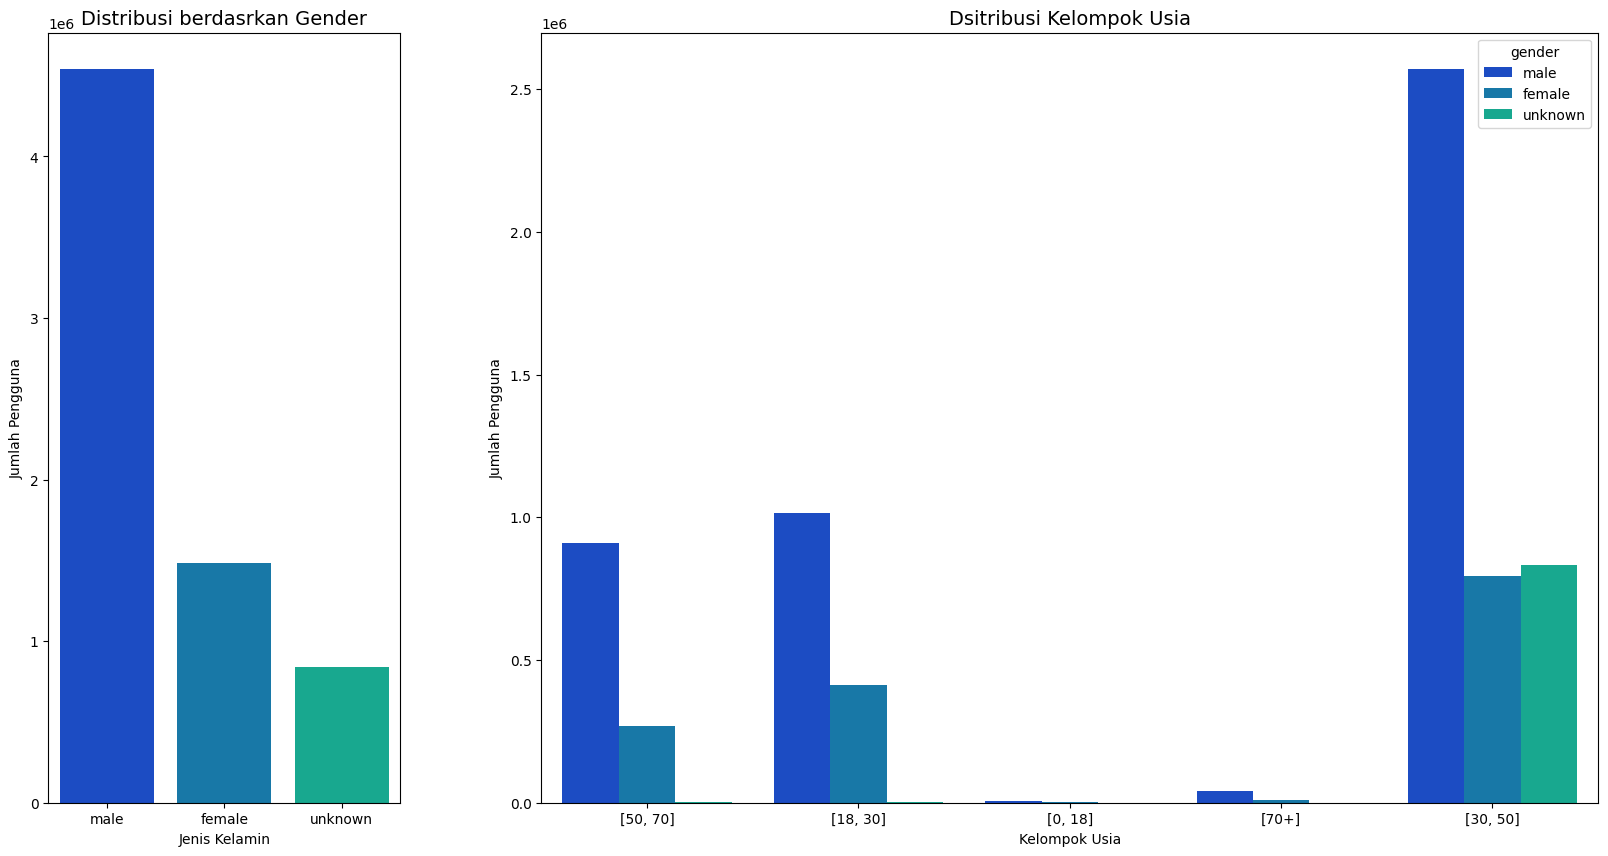

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10),  gridspec_kw={'width_ratios': [1, 3]})

sns.countplot(ax = axes[0], x='gender', data=results, palette="winter")
axes[0].set_title("Distribusi berdasrkan Gender", size = 14)
axes[0].set_xlabel('Jenis Kelamin')
axes[0].set_ylabel('Jumlah Pengguna')

sns.countplot(ax = axes[1], x='age_group', hue = 'gender',  data=results, palette="winter")
axes[1].set_title("Dsitribusi Kelompok Usia", size = 14)
axes[1].set_xlabel('Kelompok Usia')
axes[1].set_ylabel('Jumlah Pengguna')

Text(0, 0.5, 'Jumlah Pengguna')

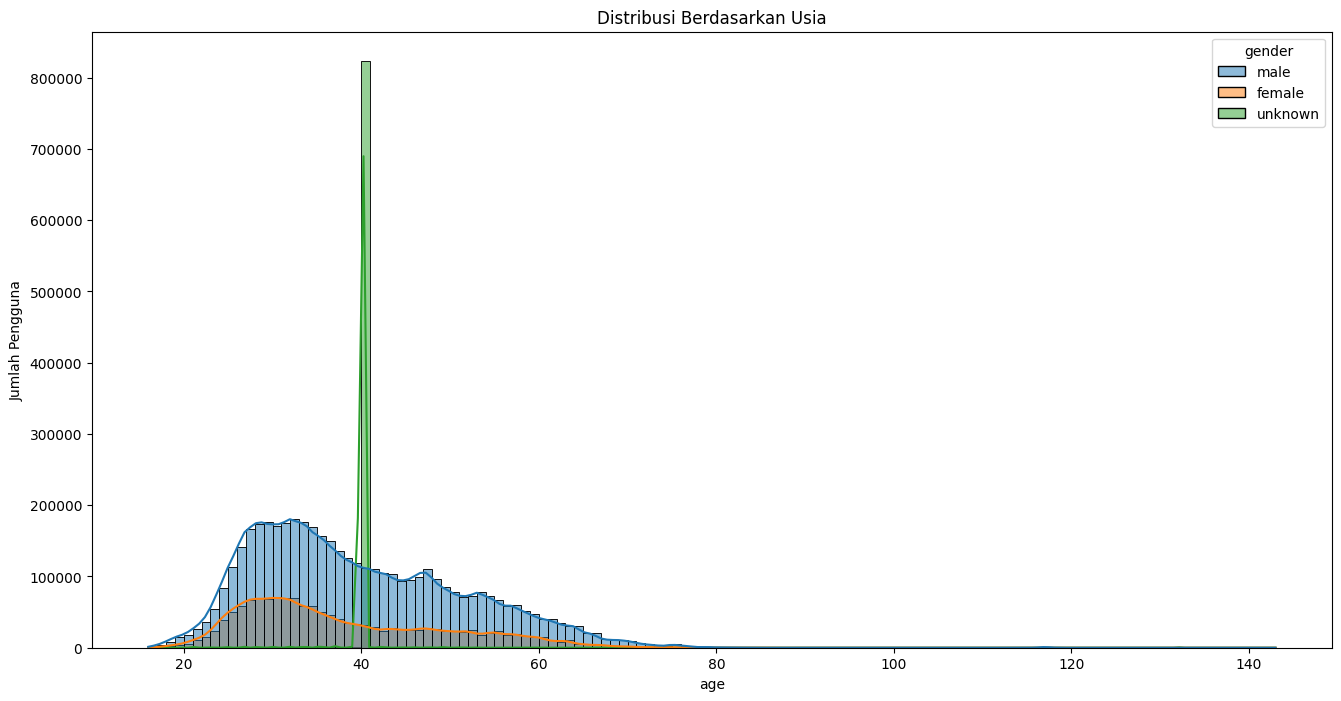

In [81]:
plt.figure(figsize=(16,8))
plt.title('Distribusi Berdasarkan Usia')
sns.histplot(data=results, x="age", hue = 'gender', binwidth=1, kde = True)
plt.ylabel('Jumlah Pengguna')

**Insight and Rekomendasi **
